# Exxon Mobil Corporation

### Stock prediction with deep learning

<br/> Gytis Kazlauskis KT-8/2
<br/> email: gytis.ka8869@gmail.com

<img src="http://jumpvine.net/wp-content/uploads/Steps-to-Creating-Company-Culture-e1508926692787.jpg" width="800" align="left"/>


<br/><b>1. Data loading and pre-processing</b>
<br/>1.1 Importing the main libraries
<br/>1.2 Importing the dataset
<br/>1.3 Feature scaling
<br/>1.4 Splitting the training set to dependent and independent variables
<br/>1.5 Reshaping the matrix
<br/><b>2. Building the RNN</b>
<br/>2.1 RNN initialization
<br/>2.2 Adding the first layer
<br/>2.3 Adding 5 more layers
<br/>2.4 Adding the output layer & compiling
<br/><b>3. Train and deploy the RNN</b>
<br/>3.1 Fit the RNN to the Training set
<br/>3.2 Computing Predictions
<br/>3.3 
<br/><b>4. Improving the RNN</b>

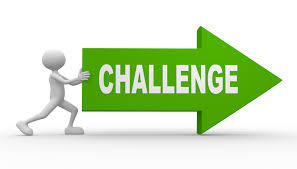

Given a 10-year history of the Exxon Mobil prices predict the stock values for the period of the recent most month that are not included in the historical data.

## Data loading and pre-processing

### Importing the main libraries

- [Numpy](http://www.numpy.org): library for the Python programming language
- [matplotlib](https://matplotlib.org): a plotting library for the Python programming language and its numerical mathematics extension NumPy.
- [pandas](https://pandas.pydata.org): software library written for the Python programming language for data manipulation and analysis.

In [ ]:
# importing the 3 main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import the dataset

Dataset description: the open high, low and close values of the Exxon Mobil from July 2009 to July 2019.


In [ ]:
#importing the dataset

# load the file contents 
dataset_train = pd.read_csv('dataset_train.csv')

In [ ]:
dataset_train.head()

In [ ]:
# Create a subtable of relevant entries (open values)
# The .values makes this vector a numpy array
training_set = dataset_train.iloc[:, 1:2].values 

In [ ]:
training_set

### Feature Scaling

The next step is to rescale our data to the range from 0 to 1. 

In [ ]:
# Feature Scaling

# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# create a scaler instance to rescale all data to the range of 0.0 to 1.0 
sc = MinMaxScaler(feature_range = (0, 1))

In [ ]:
# create the actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

### Splitting the training set to dependent and independent variables
Importing data from different sources is fundamental to data science and machine learning. The abundance of good quality data not only eliminates a lot of pre-processing steps but also determines how likely your model is going to succeed in predicting plausible outcomes.

In [ ]:
# Creating a data structure with 60 timesteps and 1 output

# the 60 stock prices in the last 3 months before today
X_train = [] 

In [ ]:
training_set_scaled.shape

In [ ]:
# the stock price today
y_train = [] 

In [ ]:
# we start from day 120 because that is the first instance allowing us to 
# go back 120 days
for i in range(120, 2516): 
    # 0 is the column ID, the only column in this case.    
    # put the last 120 days values in one row of X_train
    X_train.append(training_set_scaled[i-120:i, 0]) 
    y_train.append(training_set_scaled[i, 0])


In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

### Reshaping the Matrix

A new matrix dimension is needed to accommodate the indicator (predictor). 

<img src="http://blog.iseesystems.com/wp-content/uploads/2009/07/cube-matrix.jpg" width="500" align="left"/>

In [ ]:
# Reshaping the data matrix, we retain the 2 original dimensions and add a third of depth=1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN

### RNN initialization

- Import the sequential model from the Keras API;
- Import the Dense layer template from the Keras API;
- Import the LSTM model from the Keras API
- Create an instance of the sequential model called regressor because we want to predict a continuous value

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN as a sequence of layers
regressor = Sequential()

### Adding the first layer

<br/>We first add an object of the LSTM /class! 
<br/><b>Specifications:</b>
<br/>100 neurons
<br/>return requences = true
<br/>input shape : 3D
<br/>dropout rate = 20%

In [ ]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 100, return_sequences = True, input_shape =  (X_train.shape[1], 1)))

In [ ]:
# the argument is the dropout rate to ignore in the layers (20%), 
# i.e. 50 units * 20% = 10 units will be dropped each time
regressor.add(Dropout(0.2))


### Add More Layers

Adding 5 more layers, with 100 neurons and the dropout rate of 20%


In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
# we removed the return_sequences because we no longer return a 
# sequence but a value instead
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

### Add Output Layer & Compile

The output has 1 dimension , i.e. one value to be predicted thus or output fully connected layer has dimensionality = 1.

- **Optimizer**: rmsprop
- **Loss function**: regression problems take the mean square error as most common

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Train and deploy the RNN

### Fitting the RNN to the Training set

RNN is being trained using the data from **Training Set X** and **predictors in y**.
<br/>100 iterations will be used

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

### Computing Predictions

Create a data-frame by importing the Exxon Stock Price Test set for August 2019 using pandas and make it a numpy array.


In [ ]:
# Getting the real stock price for February 1st 2012 - 
# January 31st 2017

dataset_test = pd.read_csv('dataset_test.csv')
dataset_test

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.size

In [ ]:
real_stock_price

In [ ]:
# Getting the predicted stock price of 2017

# axis = 0 means concatenate the lines (i.e. vertical axis)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

In [ ]:
dataset_total.size


In [ ]:
# the difference in the length of the first two gives us 
# the first day in 2017, and we need to go back 60 days to get the necessary range
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values

In [ ]:
inputs.size

In [ ]:
# we did not use iloc from panda so lets reshape the numpy array for 
# compatibility: i.e. all the values from input lines to be stacked in one 
# column. The -1 means that the numpy has no knowledge of how the 
# values were stored in lines. The 1 means we want to them in one 
# column.

inputs = inputs.reshape(-1,1) 

# apply the feature scaler
inputs = sc.transform(inputs)

1. For each price in Jan. 2017 we need the **immediate 120 values** before it. 
2. We have 22 prices in August;
3. We need a numpy 3D array of 120 prices (columns) times 22 days (rows) times 1 dependent variable 

In [ ]:
# Getting the predicted stock price of 2017
X_test = []

In [ ]:
# the first 60 from inputs are from training set; start 
# from 60 and get the extra 20, i.e. up to 80
for i in range(120, 142): 
    X_test.append(inputs[i-120:i, 0])


In [ ]:
X_test = np.array(X_test) # not 3D structure yet

In [ ]:
# create a 3D structure
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
# need to inverse the scaling to get meaningful predicted stock price # outputs
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
predicted_stock_price.size

### Result Visualization


In [ ]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Exxon Mobil Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Exxon Mobil Stock Price')

plt.title('Exxon Mobil Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Exxon Mobil Stock Price')
plt.legend()

plt.show()

The blue line shows the trend of the stock for the month of January 2017. 

Some observations:
- The prediction lags behind the actual price curve because the model cannot react to fast non-linear changes. Spikes are examples of fast non-linear changes
- Model reacts pretty well to smooth changes

### Compute the RMSE

If we need to compute the RMSE for our Stock Price Prediction problem, we use the real stock price and predicted stock price as shown.

Then consider dividing this RMSE by the range of the Google Stock Price values of January 2017 to get a relative error, as opposed to an absolute error. 


In [ ]:
#import the libraries
import math
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = math.sqrt( mean_squared_error( real_stock_price[0:21,:], predicted_stock_price))
rmse

## Improving the RNN

The new data need to be placed in the same order/format  as in the case of the training/test sets.

1. Getting more training data: we trained our model on the past 5 years of the  Google Stock Price but it would be even better to train it on the past 10 years.

2. Increasing the number of time steps: the model remembered the stock price from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 time steps (3 months). You could try to increase the number of time steps, by choosing for example 120 time steps (6 months).

3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.

4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.

5. Adding more neurons in the LSTM layers: we highlighted the fact that we needed a high number of neurons in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurons in each of our 4 LSTM layers. You could try an architecture with even more neurons in each of the 4 (or more) LSTM layers.

### Fine tuning the RNN

Parameter Tuning on the RNN model: we are dealing with a Regression problem because we predict a continuous outcome.

**Tip**: replace: scoring = 'accuracy' by scoring = 'neg_mean_squared_error' in the GridSearchCV class parameters as we did in the ANN case.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
parameters = {'batch_size': [25, 32], 'epochs': [100, 500], 'optimizer': ['adam', 'rmsprop']}

In [ ]:
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 10)

In [ ]:
grid_search = grid_search.fit(X_train,y_train)

In [ ]:
best_parameters = grid_search.best_params_
best_parameters

In [ ]:
best_accuracy = grid_search.best_score_
best_accuracy